In [26]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers.legacy import Adam
import matplotlib.pyplot as plt


In [27]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [28]:
df = pd.read_csv(csv_path)
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [29]:
df.shape

(420551, 15)

In [30]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 00:10:00,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 01:10:00,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
2009-01-01 01:20:00,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
2009-01-01 01:30:00,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5


<Axes: xlabel='Date Time'>

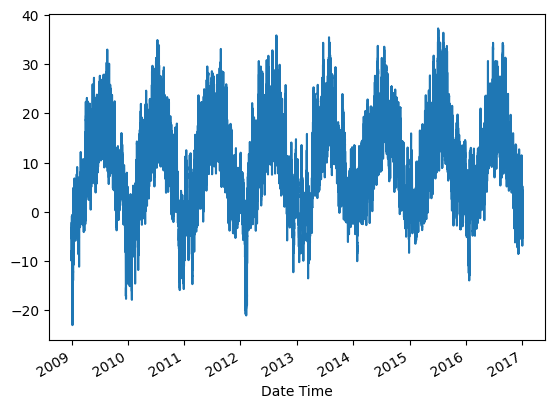

In [31]:
temp = df['T (degC)']
temp.plot()

In [32]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [33]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((420546, 5, 1), (420546,))

In [34]:

shuffled_indices = np.random.permutation(len(X1))
X1_shuffled = X1[shuffled_indices]
y1_shuffled = y1[shuffled_indices]

X_train1, y_train1 = X1_shuffled[:60000], y1_shuffled[:60000]
X_val1, y_val1 = X1_shuffled[60000:65000], y1_shuffled[60000:65000]
X_test1, y_test1 = X1_shuffled[65000:], y1_shuffled[65000:]

X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (355546, 5, 1), (355546,))

In [35]:
model = Sequential()
model.add(InputLayer((5, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
cp1 = ModelCheckpoint('model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.00001), metrics=[RootMeanSquaredError()])

In [37]:
model.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20, callbacks=[cp1])

Epoch 1/20
1863/1875 [============================>.] - ETA: 0s - loss: 146.2393 - root_mean_squared_error: 12.0929INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 5s 2ms/step - loss: 146.1311 - root_mean_squared_error: 12.0885 - val_loss: 121.0698 - val_root_mean_squared_error: 11.0032
Epoch 2/20
1840/1875 [============================>.] - ETA: 0s - loss: 96.3111 - root_mean_squared_error: 9.8138INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 4s 2ms/step - loss: 95.9402 - root_mean_squared_error: 9.7949 - val_loss: 74.4623 - val_root_mean_squared_error: 8.6292
Epoch 3/20
1850/1875 [============================>.] - ETA: 0s - loss: 59.5958 - root_mean_squared_error: 7.7198INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 4s 2ms/step - loss: 59.4326 - root_mean_squared_error: 7.7093 - val_loss: 47.9450 - val_root_mean_squared_error: 6.9242
Epoch 4/20
1840/1875 [============================>.] - ETA: 0s - loss: 39.0745 - root_mean_squared_error: 6.2510INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 38.9574 - root_mean_squared_error: 6.2416 - val_loss: 32.1490 - val_root_mean_squared_error: 5.6700
Epoch 5/20
1849/1875 [============================>.] - ETA: 0s - loss: 26.1533 - root_mean_squared_error: 5.1140INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 26.0779 - root_mean_squared_error: 5.1067 - val_loss: 21.9632 - val_root_mean_squared_error: 4.6865
Epoch 6/20
1854/1875 [============================>.] - ETA: 0s - loss: 18.1176 - root_mean_squared_error: 4.2565INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 18.0694 - root_mean_squared_error: 4.2508 - val_loss: 15.6162 - val_root_mean_squared_error: 3.9517
Epoch 7/20
1869/1875 [============================>.] - ETA: 0s - loss: 12.7933 - root_mean_squared_error: 3.5768INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 12.7813 - root_mean_squared_error: 3.5751 - val_loss: 11.1079 - val_root_mean_squared_error: 3.3329
Epoch 8/20
1840/1875 [============================>.] - ETA: 0s - loss: 8.9868 - root_mean_squared_error: 2.9978INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 4s 2ms/step - loss: 8.9735 - root_mean_squared_error: 2.9956 - val_loss: 7.7970 - val_root_mean_squared_error: 2.7923
Epoch 9/20
1837/1875 [============================>.] - ETA: 0s - loss: 6.2234 - root_mean_squared_error: 2.4947INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 6.2093 - root_mean_squared_error: 2.4919 - val_loss: 5.3904 - val_root_mean_squared_error: 2.3217
Epoch 10/20
1851/1875 [============================>.] - ETA: 0s - loss: 4.2631 - root_mean_squared_error: 2.0647INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 4.2424 - root_mean_squared_error: 2.0597 - val_loss: 3.6712 - val_root_mean_squared_error: 1.9160
Epoch 11/20
1849/1875 [============================>.] - ETA: 0s - loss: 2.8696 - root_mean_squared_error: 1.6940INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 2.8665 - root_mean_squared_error: 1.6931 - val_loss: 2.4807 - val_root_mean_squared_error: 1.5750
Epoch 12/20
1850/1875 [============================>.] - ETA: 0s - loss: 1.9327 - root_mean_squared_error: 1.3902INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 1.9247 - root_mean_squared_error: 1.3873 - val_loss: 1.6678 - val_root_mean_squared_error: 1.2914
Epoch 13/20
1836/1875 [============================>.] - ETA: 0s - loss: 1.3001 - root_mean_squared_error: 1.1402INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 1.2950 - root_mean_squared_error: 1.1380 - val_loss: 1.1290 - val_root_mean_squared_error: 1.0625
Epoch 14/20
1833/1875 [============================>.] - ETA: 0s - loss: 0.8794 - root_mean_squared_error: 0.9378INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.8806 - root_mean_squared_error: 0.9384 - val_loss: 0.7774 - val_root_mean_squared_error: 0.8817
Epoch 15/20
1850/1875 [============================>.] - ETA: 0s - loss: 0.6097 - root_mean_squared_error: 0.7808INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.6063 - root_mean_squared_error: 0.7787 - val_loss: 0.5434 - val_root_mean_squared_error: 0.7371
Epoch 16/20
1838/1875 [============================>.] - ETA: 0s - loss: 0.4286 - root_mean_squared_error: 0.6547INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.4272 - root_mean_squared_error: 0.6536 - val_loss: 0.3899 - val_root_mean_squared_error: 0.6244
Epoch 17/20
1837/1875 [============================>.] - ETA: 0s - loss: 0.3111 - root_mean_squared_error: 0.5577INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.3104 - root_mean_squared_error: 0.5571 - val_loss: 0.2883 - val_root_mean_squared_error: 0.5370
Epoch 18/20
1839/1875 [============================>.] - ETA: 0s - loss: 0.2330 - root_mean_squared_error: 0.4827INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2329 - root_mean_squared_error: 0.4826 - val_loss: 0.2201 - val_root_mean_squared_error: 0.4691
Epoch 19/20
1843/1875 [============================>.] - ETA: 0s - loss: 0.1803 - root_mean_squared_error: 0.4246INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.1810 - root_mean_squared_error: 0.4254 - val_loss: 0.1733 - val_root_mean_squared_error: 0.4163
Epoch 20/20
1857/1875 [============================>.] - ETA: 0s - loss: 0.1458 - root_mean_squared_error: 0.3819INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.1453 - root_mean_squared_error: 0.3811 - val_loss: 0.1401 - val_root_mean_squared_error: 0.3742


In [38]:
train_predictions = model.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

1875/1875 [==============================] - 1s 527us/step


,Train Predictions,Actuals
0,2.919334,2.97
1,21.775129,21.79
2,19.511290,19.23
3,13.027868,13.10
4,22.439564,22.48
...,...,...
59995,7.568598,7.40
59996,10.501624,10.50
59997,15.347777,15.25
59998,5.652726,5.79


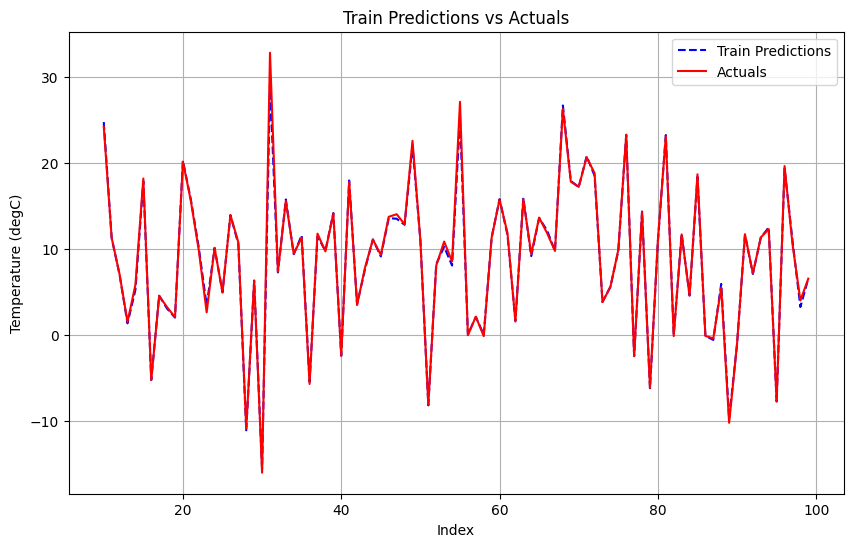

In [42]:

plt.figure(figsize=(10, 6))
plt.plot(train_results['Train Predictions'][10:100], label='Train Predictions', color='blue', linestyle='--')
plt.plot(train_results['Actuals'][10:100], label='Actuals', color='red', linestyle='-')
plt.title('Train Predictions vs Actuals')
plt.xlabel('Index')
plt.ylabel('Temperature (degC)')
plt.legend()
plt.grid(True)
plt.show()

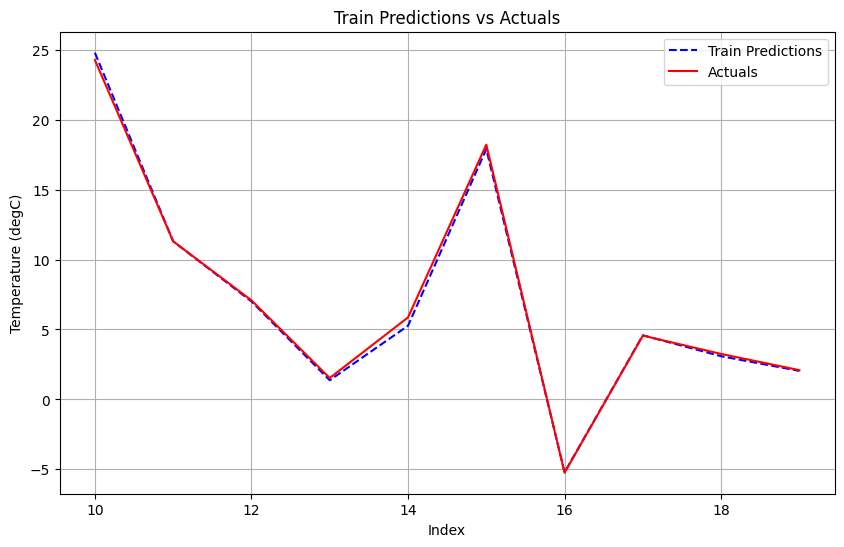

In [44]:

plt.figure(figsize=(10, 6))
plt.plot(train_results['Train Predictions'][10:20], label='Train Predictions', color='blue', linestyle='--')
plt.plot(train_results['Actuals'][10:20], label='Actuals', color='red', linestyle='-')
plt.title('Train Predictions vs Actuals')
plt.xlabel('Index')
plt.ylabel('Temperature (degC)')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
test_predictions = model.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

11111/11111 [==============================] - 6s 529us/step


,Test Predictions,Actuals
0,-1.110369,-0.29
1,12.989172,12.97
2,11.460305,11.20
3,-13.410383,-13.33
4,9.364886,9.64
...,...,...
355541,-3.225089,-3.14
355542,18.753998,18.85
355543,-5.544950,-5.92
355544,14.887558,14.74


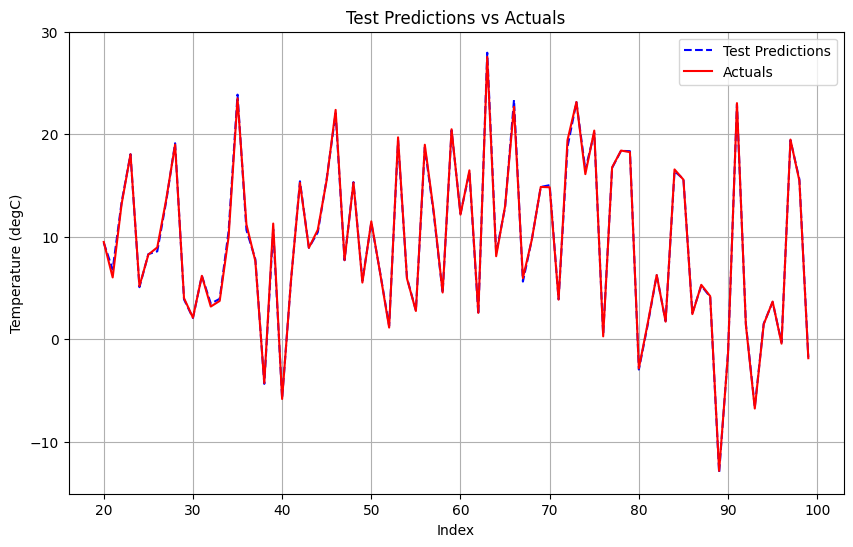

In [46]:

plt.figure(figsize=(10, 6))
plt.plot(test_results['Test Predictions'][20:100], label='Test Predictions', color='blue', linestyle='--')
plt.plot(test_results['Actuals'][20:100], label='Actuals', color='red', linestyle='-')
plt.title('Test Predictions vs Actuals')
plt.xlabel('Index')
plt.ylabel('Temperature (degC)')
plt.legend()
plt.grid(True)
plt.show()

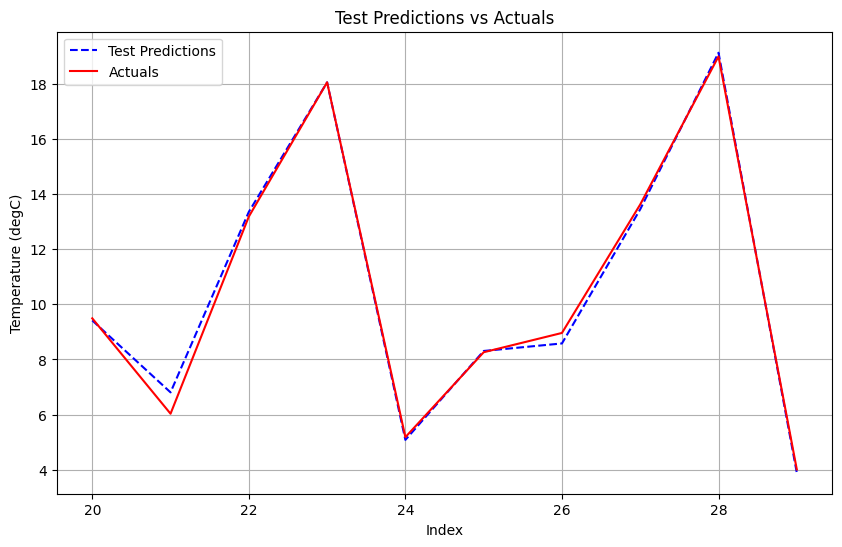

In [47]:

plt.figure(figsize=(10, 6))
plt.plot(test_results['Test Predictions'][20:30], label='Test Predictions', color='blue', linestyle='--')
plt.plot(test_results['Actuals'][20:30], label='Actuals', color='red', linestyle='-')
plt.title('Test Predictions vs Actuals')
plt.xlabel('Index')
plt.ylabel('Temperature (degC)')
plt.legend()
plt.grid(True)
plt.show()